In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data-edited.csv')

In [3]:
df.head()

,Age Group,City,Gender,Education Level,Occupation,Family Members,Annual Income,Charging Hours,Electric Cars are economical,Charging stations,Convert your car to all electric,Hybrid or Both,Next car will be electric car?
0,29,Kolkata,Male,Postgraduate,Working Professional,5,150000,1,Yes,15,Yes,Hybrid car,5
1,29,Mumbai,Male,Graduate,Working Professional,4,1000000,1,Yes,8,Yes,Electric car,5
2,25,Mumbai,Male,Graduate,Working Professional,4,5000,5,Yes,15,Didn't think about it,Hybrid car,5
3,25,Bangalore,Male,Graduate,Working Professional,4,750000,1,Don't know,8,Didn't think about it,Hybrid car,5
4,21,Mumbai,Male,Postgraduate,Student,4,5000,12,Don't know,15,Didn't think about it,Hybrid car,5


In [4]:
df.dtypes

Age Group                            int64
City                                object
Gender                              object
Education Level                     object
Occupation                          object
Family Members                       int64
Annual Income                        int64
Charging Hours                       int64
 Electric Cars are economical       object
Charging stations                    int64
Convert your car to all electric    object
Hybrid or Both                      object
 Next car will be electric car?      int64
dtype: object

In [5]:
df.shape

(299, 13)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder()

In [8]:
df.dtypes

Age Group                            int64
City                                object
Gender                              object
Education Level                     object
Occupation                          object
Family Members                       int64
Annual Income                        int64
Charging Hours                       int64
 Electric Cars are economical       object
Charging stations                    int64
Convert your car to all electric    object
Hybrid or Both                      object
 Next car will be electric car?      int64
dtype: object

In [9]:
df['City']= label_encoder.fit_transform(df['City'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Education Level']= label_encoder.fit_transform(df['Education Level'])
df['Occupation']= label_encoder.fit_transform(df['Occupation'])
df[' Electric Cars are economical']= label_encoder.fit_transform(df[' Electric Cars are economical'])
df['Convert your car to all electric']= label_encoder.fit_transform(df['Convert your car to all electric'])
df['Hybrid or Both']= label_encoder.fit_transform(df['Hybrid or Both'])

In [10]:
df.head()

,Age Group,City,Gender,Education Level,Occupation,Family Members,Annual Income,Charging Hours,Electric Cars are economical,Charging stations,Convert your car to all electric,Hybrid or Both,Next car will be electric car?
0,29,14,2,3,2,5,150000,1,2,15,2,1,5
1,29,0,2,1,2,4,1000000,1,2,8,2,0,5
2,25,19,2,1,2,4,5000,5,2,15,0,1,5
3,25,3,2,1,2,4,750000,1,0,8,0,1,5
4,21,19,2,3,1,4,5000,12,0,15,0,1,5


In [11]:
import matplotlib.pyplot as plt

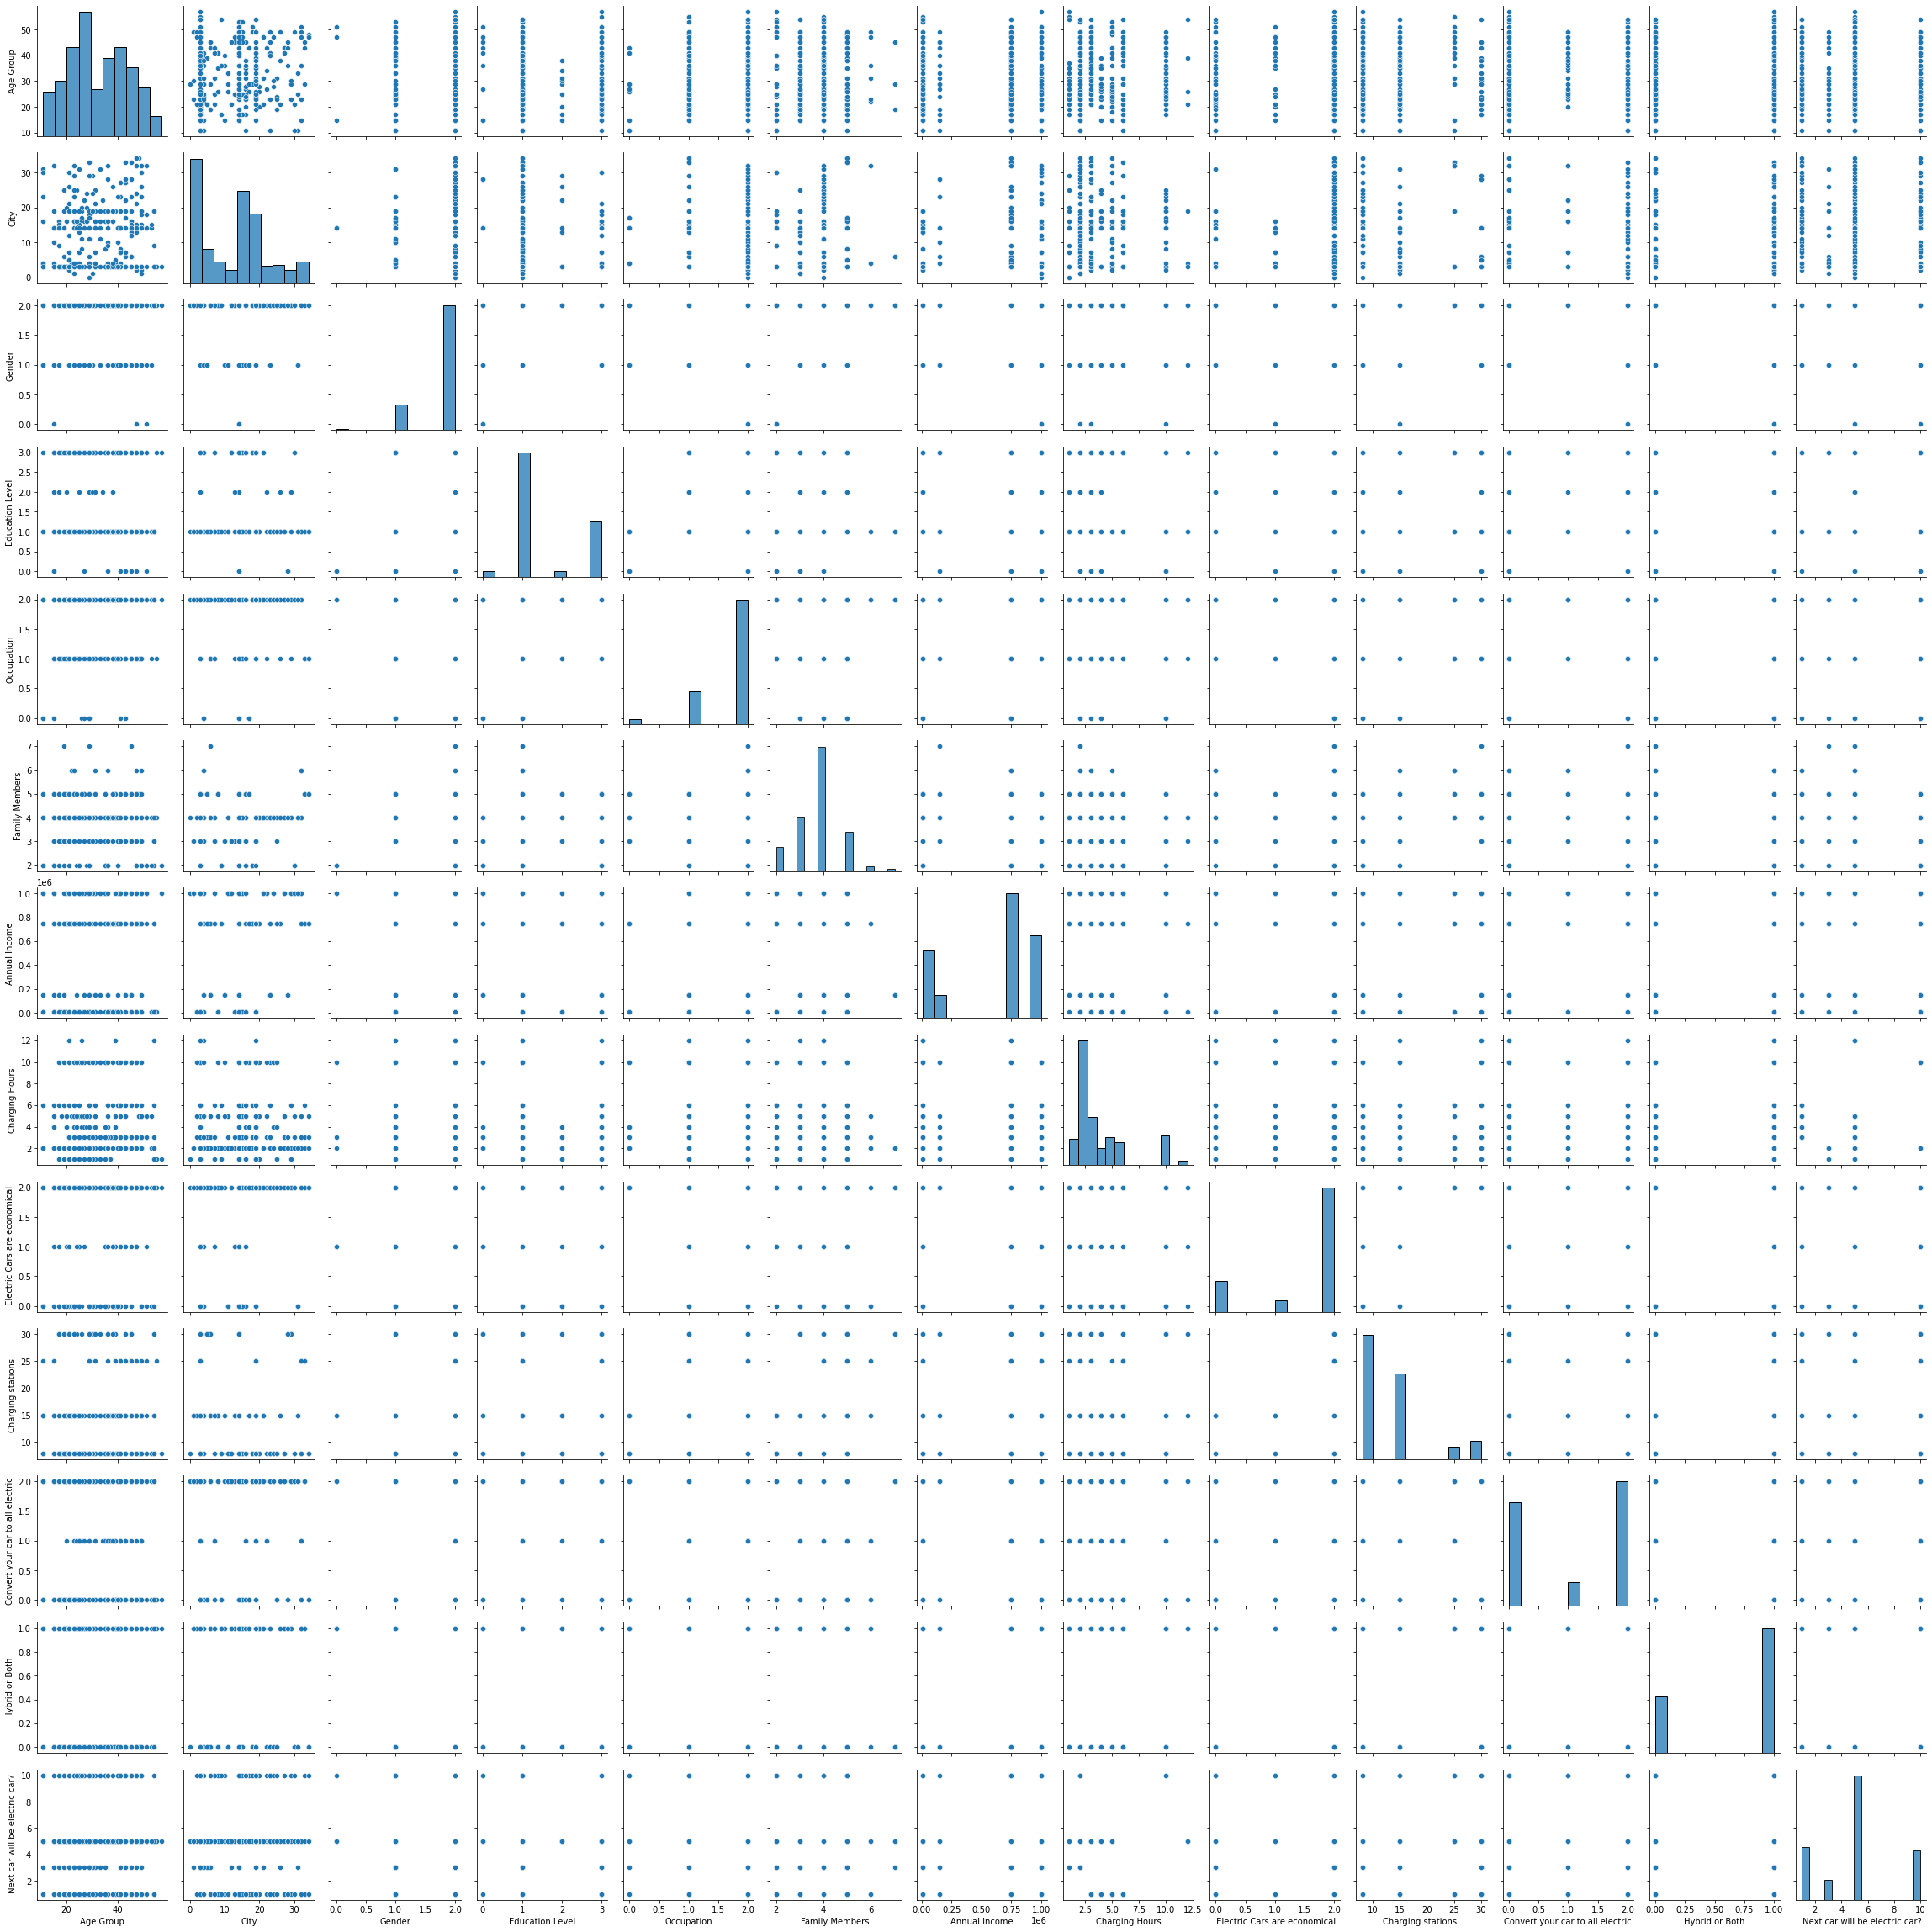

In [19]:
sns.pairplot(df)

In [20]:
from pandas_profiling import ProfileReport
pf = ProfileReport(df)

In [21]:
pf.to_widgets()

In [22]:
pf.to_file("encode.html")


In [23]:
df.head()

,Age Group,City,Gender,Education Level,Occupation,Family Members,Annual Income,Charging Hours,Electric Cars are economical,Charging stations,Convert your car to all electric,Hybrid or Both,Next car will be electric car?
0,29,14,2,3,2,5,150000,1,2,15,2,1,5
1,29,0,2,1,2,4,1000000,1,2,8,2,0,5
2,25,19,2,1,2,4,5000,5,2,15,0,1,5
3,25,3,2,1,2,4,750000,1,0,8,0,1,5
4,21,19,2,3,1,4,5000,12,0,15,0,1,5


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [25]:
X = df.drop(['City'],axis=1)
y = df['City']

In [26]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [27]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Age Group,8.759622
1,City,3.015492
2,Gender,19.758468
3,Education Level,3.690616
4,Occupation,14.447145
5,Family Members,14.646764
6,Annual Income,4.334309
7,Charging Hours,2.861723
8,Electric Cars are economical,5.965893
9,Charging stations,5.538562


In [28]:
#WE CAN SEE THAT OCCUPATION,FAMILYMEMBERS AND GENDER HAVE MULTICOLLINEARITY

#HOWEVER WE CAN DROP OCUPATION COLUMN AND FAMILY MEMBERS

In [29]:
X = X.drop(['Family Members', 'Occupation'], axis=1)

In [30]:
X.head()

,Age Group,City,Gender,Education Level,Annual Income,Charging Hours,Electric Cars are economical,Charging stations,Convert your car to all electric,Hybrid or Both
0,29,14,2,3,150000,1,2,15,2,1
1,29,0,2,1,1000000,1,2,8,2,0
2,25,19,2,1,5000,5,2,15,0,1
3,25,3,2,1,750000,1,0,8,0,1
4,21,19,2,3,5000,12,0,15,0,1


In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)


In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)